<a href="https://colab.research.google.com/github/owolabi35/Data/blob/master/Copy_of_Pycaret_Use_Cases_on_Customer_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

     |████████████████████████████████| 264 kB 23.9 MB/s 
     |████████████████████████████████| 2.0 MB 39.1 MB/s 
     |████████████████████████████████| 167 kB 40.0 MB/s 
     |████████████████████████████████| 80 kB 8.9 MB/s 
     |████████████████████████████████| 14.6 MB 118 kB/s 
     |████████████████████████████████| 1.7 MB 71.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 37.6 MB/s 
     |████████████████████████████████| 1.3 MB 42.8 MB/s 
     |████████████████████████████████| 111 kB 72.2 MB/s 
     |████████████████████████████████| 248 kB 62.3 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 271 kB 68.6 MB/s 
     |████████████████████████████████| 102 kB 56.3 MB/s 
     |████████████████████████████████| 62 kB 794 kB/s 
     |███████████████████

In [ ]:
import pandas as pd
import numpy as np# read csv data
data = pd.read_csv('https://raw.githubusercontent.com/srees1988/predict-churn-py/main/customer_churn_data.csv')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# check data types
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Notice that TotalCharges is of an object type instead of float64. Upon investigation, I figured out there are some blank spaces in this column which has caused Python to force the data type as object . To fix that, we will have to trim blank spaces before changing the data type.

In [ ]:
# replace blanks with np.nan
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

# convert to float64
data['TotalCharges'] = data['TotalCharges'].astype('float64')

In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
import plotly.express as px

fig = px.scatter(x=data['tenure'], y=data['TotalCharges'], 
                 color = data['Churn'], template = 'presentation', 
                 opacity = 0.9, facet_col = data['Contract'], 
                 title = 'Customer Churn by Tenure, Charges, and Contract Type',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Total Charges $'})
                
fig.show()

Notice that most churn can be seen in the contracts that are “Month-to-Month”. Makes sense, ofcourse. Also, I can see that as the tenure increases and so are the total charges, the likelihood of customers with high tenure and low charges is less compared to customers with high tenure and high charges.

In [ ]:
# check missing values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Notice that because we replaced blank values with np.nan there are now 11 rows with missing values in TotalCharges. No problem — I will leave it with PyCaret to impute it automatically.

In [ ]:
# init setup
from pycaret.classification import *
s = setup(data, target = 'Churn', ignore_features = ['customerID'])

,Description,Value
0,session_id,305
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7043, 21)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


Model Training & Selection

Now that data preparation is done, let’s start the training process by using compare_models functionality. This function trains all the algorithms available in the model library and evaluates multiple performance metrics using cross-validation.

In [ ]:
# compare all models
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8004,0.8367,0.5308,0.6499,0.5838,0.4544,0.4587,0.409
gbc,Gradient Boosting Classifier,0.7931,0.8361,0.4947,0.6421,0.5577,0.4258,0.4326,0.672
ada,Ada Boost Classifier,0.7927,0.8354,0.5001,0.6384,0.5604,0.4274,0.4331,0.253
lda,Linear Discriminant Analysis,0.7970,0.8294,0.5461,0.6337,0.5861,0.4527,0.4552,0.041
lightgbm,Light Gradient Boosting Machine,0.7876,0.8219,0.5093,0.6205,0.5587,0.4208,0.4248,0.173
nb,Naive Bayes,0.7355,0.8216,0.7680,0.4996,0.6052,0.4195,0.4417,0.021
rf,Random Forest Classifier,0.7842,0.8104,0.4739,0.6205,0.5369,0.3996,0.4060,0.786
et,Extra Trees Classifier,0.7690,0.7791,0.4578,0.5797,0.5106,0.3624,0.3673,0.764
knn,K Neighbors Classifier,0.7602,0.7298,0.4286,0.5603,0.4855,0.3329,0.3380,0.138
dt,Decision Tree Classifier,0.7172,0.6444,0.4885,0.4657,0.4763,0.2830,0.2834,0.038


The best model based on AUC is Gradient Boosting Classifier . AUC using 10-fold cross-validation is 0.84562.

In [ ]:
# print best_model parameters
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=305, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Hyperparameter Tuning

You can use the tune_model function from PyCaret to automatically tune the hyperparameters of the model.

In [ ]:
# tune best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8276,0.8531,0.5769,0.7143,0.6383,0.5268,0.5320
1,0.8114,0.8398,0.5846,0.6609,0.6204,0.4955,0.4972
2,0.7972,0.8268,0.5231,0.6415,0.5763,0.4447,0.4487
3,0.8032,0.8396,0.4692,0.6854,0.5571,0.4363,0.4492
4,0.7830,0.8058,0.4846,0.6117,0.5408,0.4012,0.4058
5,0.8032,0.8474,0.5308,0.6571,0.5872,0.4600,0.4645
6,0.7972,0.8405,0.5385,0.6364,0.5833,0.4505,0.4533
7,0.7972,0.8352,0.5769,0.6250,0.6000,0.4644,0.4651
8,0.7972,0.8279,0.4809,0.6632,0.5575,0.4302,0.4396
9,0.7870,0.8437,0.5191,0.6182,0.5643,0.4248,0.4276


# Model Analysis

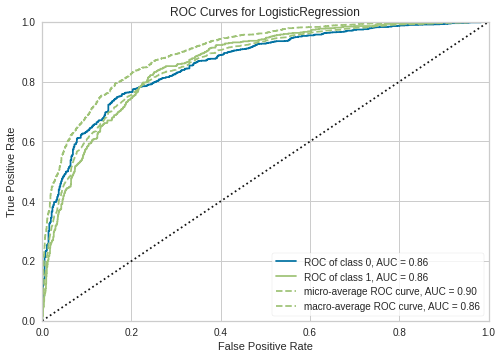

In [ ]:
# AUC Plot
plot_model(tuned_best_model, plot = 'auc')

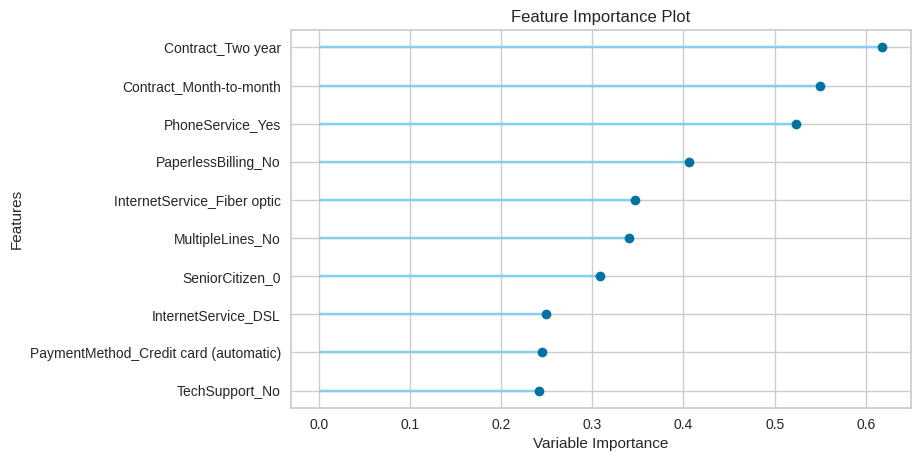

In [ ]:
# Feature Importance Plot
plot_model(tuned_best_model, plot = 'feature')

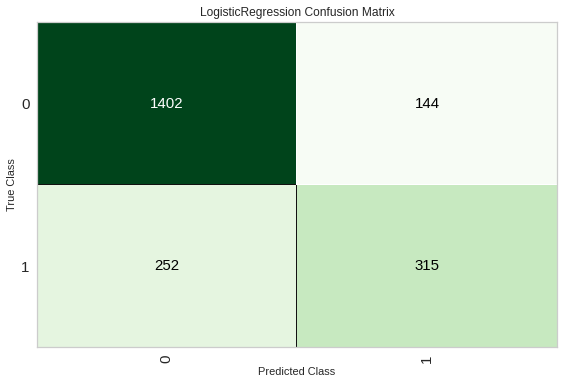

In [ ]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')

This confusion matrix is on the test set which includes 30% of our data (2,113 rows) We have 294 True Positives (16%) — these are the customers for which we will be able to extend the lifetime value. If we wouldn’t have predicted, then there was no opportunity for intervention.

We also have 178 (9%) False Positives where we will lose money because the promotion offered to these customers will just be an extra cost.

1,342 (59%) are True Negatives (good customers) and 299 (16%) are False Negative (this is a missed opportunity).

highest AUC, followed by tuning the hyperparameters of the best model to squeeze a little more performance in terms of AUC. However, the best AUC doesn’t necessarily translate into the best model for business.

In a churn model, often the reward of true positives is way different than the cost of false positives. Let’s use the following assumptions:

    $1,000 voucher will be offered to all the customers identified as churn (True Positive + False Positive);
    If we are able to stop the churn, we will gain $5,000 in customer lifetime value.

Using these assumptions and the confusion matrix above, we can calculate the $ impact of this model:

It’s a good model but the problem is it’s not a business-smart model. It is doing a pretty good job compared to if you have no model but how can we train and select a model that maximizes the business value. In order to achieve that we have to train, select, and optimize models using business metrics instead of any conventional metric like AUC or Accuracy.

Adding Custom Metric in PyCaret

Thanks to PyCaret, it is extremely easy to achieve this using add_metric function.

In [ ]:
# create a custom function
def calculate_profit(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (5000-1000), 0)
    fp = np.where((y_pred==1) & (y==0), -1000, 0)
    return np.sum([tp,fp])
    
    # add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

Name                                                        Profit
Display Name                                                Profit
Score Function       <function calculate_profit at 0x7f9795236cb0>
Scorer                               make_scorer(calculate_profit)
Target                                                        pred
Args                                                            {}
Greater is Better                                             True
Multiclass                                                    True
Custom                                                        True
Name: profit, dtype: object

In [ ]:
#Now let’s run compare_models and see the magic.

# compare all models
best_model = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
nb,Naive Bayes,0.7355,0.8216,0.7680,0.4996,0.6052,0.4195,0.4417,299800.0,0.024
lda,Linear Discriminant Analysis,0.7970,0.8294,0.5461,0.6337,0.5861,0.4527,0.4552,243400.0,0.041
lr,Logistic Regression,0.8004,0.8367,0.5308,0.6499,0.5838,0.4544,0.4587,239100.0,0.119
lightgbm,Light Gradient Boosting Machine,0.7876,0.8219,0.5093,0.6205,0.5587,0.4208,0.4248,224400.0,0.131
ada,Ada Boost Classifier,0.7927,0.8354,0.5001,0.6384,0.5604,0.4274,0.4331,223300.0,0.258
ridge,Ridge Classifier,0.7955,0.0000,0.4931,0.6488,0.5599,0.4300,0.4372,222000.0,0.023
gbc,Gradient Boosting Classifier,0.7931,0.8361,0.4947,0.6421,0.5577,0.4258,0.4326,221400.0,0.674
rf,Random Forest Classifier,0.7842,0.8104,0.4739,0.6205,0.5369,0.3996,0.4060,208900.0,0.774
svm,SVM - Linear Kernel,0.6819,0.0000,0.5757,0.5072,0.4845,0.2872,0.3217,198100.0,0.066
et,Extra Trees Classifier,0.7690,0.7791,0.4578,0.5797,0.5106,0.3624,0.3673,195100.0,0.777


Notice that a new column Profit is added this time and surprisingly Naive Bayes which is a pretty bad model in terms of AUC is the best model when it comes to profit. Let’s see how:

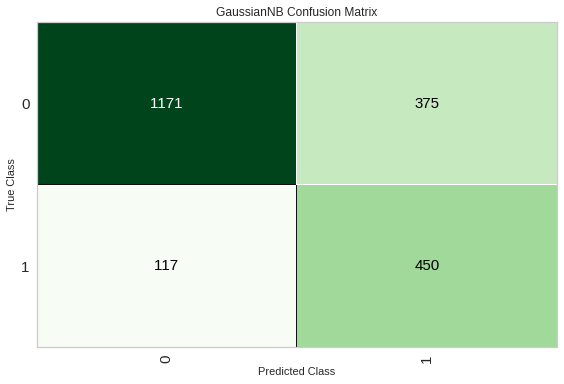

In [ ]:
# confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

    BAM! We have just increased profit by ~$400,000 with a model that does 2% less in AUC than the best model. How does this happen? Well, for starters, AUC or any other out-of-the-box classification metric (Accuracy, Recall, Precision, F1, Kappa, etc.) is not a business-smart metric, so it does not take into account the risk and reward proposition. Adding a custom metric and using it for model selection or optimization is a great idea and right way to go with.